In [75]:
import numpy
import random
import matplotlib.pyplot as plt

import json
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [68]:
with open('results/2020-09-13 18:36:30.896700_result.json') as f:
    data = json.load(f)

In [69]:
data = data['states']

[{'board_size': [25, 25],
  'players_scores': {'Second Champ': 1, 'First Champ': 1, 'Third Champ': 1},
  'players_statuses': {'Second Champ': True,
   'First Champ': True,
   'Third Champ': True},
  'players_positions': {'Second Champ': [[11, 14],
    [10, 14],
    [9, 14],
    [8, 14],
    [7, 14],
    [7, 13]],
   'First Champ': [[20, 4], [19, 4], [18, 4], [17, 4], [16, 4], [16, 3]],
   'Third Champ': [[21, 12],
    [20, 12],
    [19, 12],
    [18, 12],
    [17, 12],
    [16, 12]]},
  'previous_player_actions': {'Second Champ': 'LEFT',
   'First Champ': 'LEFT',
   'Third Champ': 'DOWN'}},
 {'board_size': [25, 25],
  'players_scores': {'Second Champ': 2, 'First Champ': 2, 'Third Champ': 2},
  'players_statuses': {'Second Champ': True,
   'First Champ': True,
   'Third Champ': True},
  'players_positions': {'Second Champ': [[10, 14],
    [9, 14],
    [8, 14],
    [7, 14],
    [7, 13],
    [7, 12]],
   'First Champ': [[19, 4], [18, 4], [17, 4], [16, 4], [16, 3], [16, 2]],
   'Third Cham

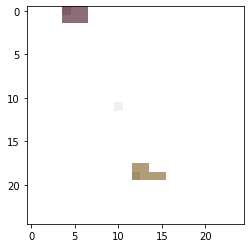

In [76]:
player_names_mapping = {
    
}


def get_color_by_player_name(player_name):
    global player_names_mapping
    if player_name not in player_names_mapping:
        player_names_mapping[player_name] = (random.randint(90, 200), random.randint(90, 200), random.randint(90, 200))
    return player_names_mapping[player_name]


def build_board_from_sate(state: dict):
    
    white_color = (255, 255, 255)
    
    board_size = state['board_size']
    board = [[white_color for j in range(board_size[1])] for i in range(board_size[0])]
    for player, positions in state['players_positions'].items():
        
        color = get_color_by_player_name(player)
        
        if not state['players_statuses'][player]:
            color = white_color
            
        for p in positions[:-1]:
            board[p[0]][p[1]] = color
        
        board[positions[-1][0]][positions[-1][1]] = (color[0] - 15, color[1] - 15, color[2] - 15)
            
    return board



fig, ax = plt.subplots()
im = ax.imshow(build_board_from_sate(data[0]))


def init():
    im.set_data(build_board_from_sate(data[0]))
    return im,

def animate(i):
    im.set_data(build_board_from_sate(data[i]))
    return im,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(data), interval=200, blit=True)
 
 
anim.save('worm_fight.gif', writer='imagemagick')

AttributeError: 'AxesImage' object has no attribute 'set_title'

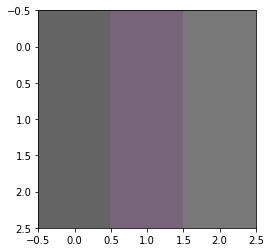

In [78]:
fig, ax = plt.subplots()
im = ax.imshow([
    [[100, 100, 100], [120, 100, 120], [120, 120, 120]],
    [[100, 100, 100], [120, 100, 120], [120, 120, 120]],
    [[100, 100, 100], [120, 100, 120], [120, 120, 120]],
])
